# Dataset with DB

## Create parquet

In [2]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
stock_source_files = glob.glob("L:/data/yfinance/yfinance_*_D1.csv")
fx_source_files = glob.glob("L:/data/fx/OANDA-Japan MT5 Live/*d1.csv")

In [4]:
def get_tick_size(price: float) -> float:
    if price < 1000:
        return 0.1
    elif price < 3000:
        return 0.5
    elif price < 5000:
        return 1
    elif price < 30000:
        return 5
    elif price < 50000:
        return 10
    else:
        return 50

def price_to_ticks(price: float) -> int:
    tick_size = get_tick_size(price)
    ticks = round(price / tick_size)
    return ticks

def ticks_to_price(ticks: int, reference_price: float) -> float:
    tick_size = get_tick_size(reference_price)
    return ticks * tick_size

file: L:/data/yfinance\yfinance_2269.T_D1.csv std: 170.67572853841986 max: 11773.0 ratio: 68.97875931638309
file: L:/data/yfinance\yfinance_2801.T_D1.csv std: 222.02206340023642 max: 15595.0 ratio: 70.24076689120345
file: L:/data/yfinance\yfinance_3382.T_D1.csv std: 128.09772970341928 max: 8468.0 ratio: 66.10577735925297
file: L:/data/yfinance\yfinance_4063.T_D1.csv std: 221.0728648446471 max: 16106.0 ratio: 72.8538077765358
file: L:/data/yfinance\yfinance_4543.T_D1.csv std: 134.07077259020647 max: 5761.0 ratio: 42.96984263385103
file: L:/data/yfinance\yfinance_4901.T_D1.csv std: 114.89514287792386 max: 6510.0 ratio: 56.660358627317066
file: L:/data/yfinance\yfinance_5019.T_D1.csv std: 484.7257370627226 max: 31328.0 ratio: 64.63036229484595
file: L:/data/yfinance\yfinance_6702.T_D1.csv std: 563.7637483279982 max: 43646.0 ratio: 77.41895453449185
file: L:/data/yfinance\yfinance_6703.T_D1.csv std: 137.98447678669777 max: 3138.0 ratio: 22.74168858030931
file: L:/data/yfinance\yfinance_685

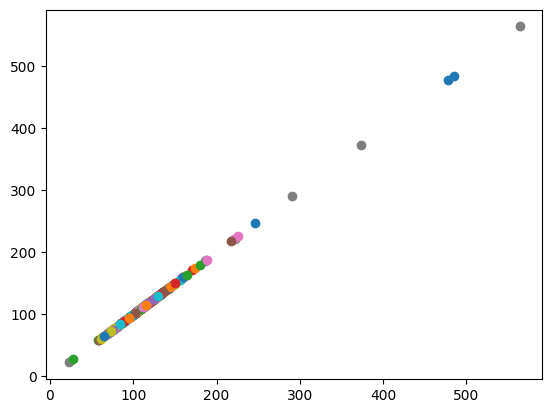

In [28]:
for file in stock_source_files:
  df = pd.read_csv(file, index_col=0, parse_dates=True)
  units = df["Adj Close"].apply(get_tick_size)
  unit_close = (df["Adj Close"].diff() / units ).round()
  std = unit_close.std()
  max_value = unit_close.abs().max()
  mean_value = unit_close.std()
  plt.scatter(mean_value, std)
  if std > 1000 or max_value > 3000:
        print(f"file: {file} std: {std} max: {max_value} ratio: {max_value/std}")
        continue

  unit_close.name = "close"
  # plt.hist(unit_close, bins=100, alpha=0.3)
  filename = f"../../Data/STOCK_ID/{os.path.basename(file)}"
  os.makedirs(os.path.dirname(filename), exist_ok=True)
  unit_close.to_csv(filename, index=True, header=True)

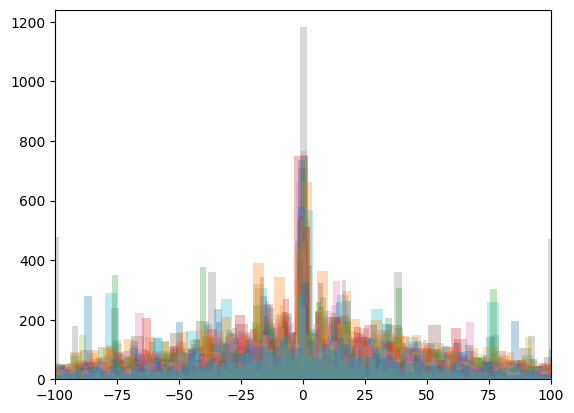

In [ ]:
stock_id_files = glob.glob("../../Data/STOCK_ID/*")
for file in stock_id_files:
    id_df = pd.read_csv(file, index_col=0, parse_dates=True)
    plt.hist(id_df, bins=1000, alpha=0.3)
    plt.xlim(-100, 100)

In [17]:
def count_sig_digits_visual(x, tol=1e-12):
    """
    浮動小数点誤差を無視し、人間の目で見たときの有効数字の桁数を推定
    """
    if x == 0 or np.isnan(x):
        return 0

    # 誤差を無視するため丸める（例: tol=1e-12 → 12桁以内に収める）
    rounded = round(x / tol) * tol  # 例: tol=1e-12 の精度で揃える
    # 見た目ベースで桁数を数える（指数表現なし）
    s = format(rounded, '.15g')  # 最大15桁の精度で、人間が見る表現に近づける
    s = s.replace('.', '')
    return len(s)

def group_by_close_values(series, atol=1e-12, rtol=1e-9):
    values = np.sort(series[series > 0].values)
    if len(values) == 0:
        return pd.DataFrame(columns=["count", "sigfig_min", "sigfig_max", "sigfig_median"])

    groups = []
    current_group = [values[0]]

    for val in values[1:]:
        if np.isclose(val, current_group[-1], atol=atol, rtol=rtol):
            current_group.append(val)
        else:
            groups.append(current_group)
            current_group = [val]

    if current_group:
        groups.append(current_group)

    # 結果をまとめる
    rows = []
    for group in groups:
        key = np.median(group)
        rows.append({
            "value": key,
            "count": len(group),
        })

    return pd.DataFrame(rows).set_index("value").sort_index()

file: L:/data/fx/OANDA-Japan MT5 Live\mt5_COPPER_d1.csv std: 5272.182789800234 max: 41638 ratio: 7.897677614773612
>> unit: 1e-05 sf: 5
file: L:/data/fx/OANDA-Japan MT5 Live\mt5_NL25_d1.csv std: 3506.668976126979 max: 32225 ratio: 9.189632731057392
>> unit: 0.002 sf: 4
file: L:/data/fx/OANDA-Japan MT5 Live\mt5_USDNOK_d1.csv std: 7204.925965708741 max: 79363 ratio: 11.015102775201541
>> unit: 1e-05 sf: 5
file: L:/data/fx/OANDA-Japan MT5 Live\mt5_USDSEK_d1.csv std: 6186.613499483017 max: 38157 ratio: 6.167671538425437
>> unit: 1e-05 sf: 5
file: L:/data/fx/OANDA-Japan MT5 Live\mt5_USDTRY_d1.csv std: 10733.53091189724 max: 316685 ratio: 29.50427055173248
>> unit: 1e-05 sf: 5
file: L:/data/fx/OANDA-Japan MT5 Live\mt5_USDZAR_d1.csv std: 2605.970693542824 max: 32358 ratio: 12.41687025881677
>> unit: 5e-05 sf: 5
file: L:/data/fx/OANDA-Japan MT5 Live\mt5_XAGUSD_d1.csv std: 4307.833538336368 max: 48063 ratio: 11.157116349152464
>> unit: 0.0001 sf: 5
file: L:/data/fx/OANDA-Japan MT5 Live\mt5_XAUU

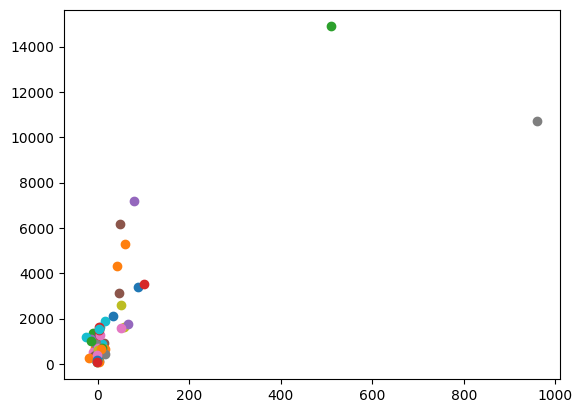

In [27]:
for file in fx_source_files:
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    diff_df = df["close"].diff()
    diff_df_abs = diff_df.abs()
    diff_df_abs = diff_df_abs[diff_df_abs > 0]
    result_df = group_by_close_values(diff_df_abs)
    sf = count_sig_digits_visual(result_df.index[1] - result_df.index[0])
    unit =  result_df.index[0].round(sf)
    # print(f"file:{file}, unit: {unit} sf: {sf}")
    diff_df = diff_df.round(sf)
    id_token_df = (diff_df.dropna() / unit).round().astype('int')

    std_value = id_token_df.std()
    max_value = id_token_df.abs().max()
    mean_value = id_token_df.mean()
    plt.scatter(mean_value, std_value)
    if std_value > 10000 or max_value > 30000:
        print(f"file: {file} std: {std_value} max: {max_value} ratio: {max_value/std_value}")
        print(f">> unit: {unit} sf: {sf}")
        continue
    filename = f"../../Data/FX_MT5_ID/{os.path.basename(file)}"
    os.makedirs(os.path.dirname(filename), exist_ok=True)
    id_token_df.to_csv(filename, index=True, header=True)

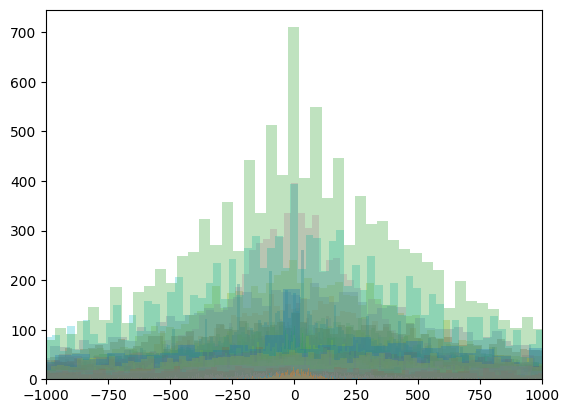

In [22]:
fx_id_files = glob.glob("../../Data/FX_MT5_ID/*")
for file in fx_id_files:
    id_df = pd.read_csv(file, index_col=0, parse_dates=True)
    plt.hist(id_df, bins=1000, alpha=0.3)
    plt.xlim(-1000, 1000)

In [20]:
fx_id_files = glob.glob("../../Data/FX_MT5_ID/*")
fx_stds = {}
for file in fx_id_files:
    id_df = pd.read_csv(file, index_col=0, parse_dates=True)
    symbol = os.path.basename(file)
    fx_stds[symbol] = id_df.std()

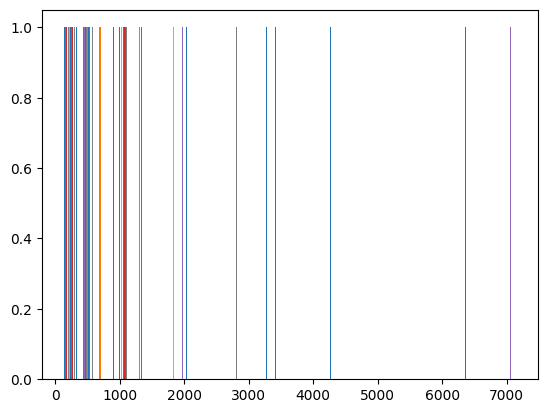

In [25]:
_ = plt.hist(fx_stds.values(), bins=10)

In [127]:
stock_id_folder = "../../Data/FX_MT5_ID"
fx_id_folder = "../../Data/STOCK_ID"
output_folder = "../../Data/ID"

if os.path.exists(output_folder) is False:
    os.makedirs(output_folder, exist_ok=True)

stock_id_files = glob.glob(f"{stock_id_folder}/*")
fx_id_files = glob.glob(f"{fx_id_folder}/*")

for files in [stock_id_files, fx_id_files]:
    for file in files:
        df = pd.read_csv(file, index_col=0, parse_dates=True)
        # convert minus for embedding
        p_values = df[df > 0] * 2 - 1
        p_values = p_values.fillna(0)
        n_values = (df[df < 0] * 2).abs()
        n_values = n_values.fillna(0)
        id_df = p_values + n_values
        # save it as parquet for better performance
        filename = os.path.basename(file)
        filename = filename.replace(".csv", ".parquet")
        file_path = os.path.join(output_folder, filename)
        id_df.to_parquet(file_path, index=False)

## Create Dataset by DuckDB

In [ ]:
files = glob.glob(f"{output_folder}/*")
parquet_paths = {}

for file in files:
    symbol = file.split("_")[1]
    parquet_paths[symbol] = file

In [100]:
import torch
from torch.utils.data import Dataset, DataLoader
import duckdb
import random

class DuckDBTimeSeriesDataset(Dataset):
    def __init__(self, parquet_paths: dict, L: int, virtual_size: int = 100000, batch_size=None):
        """
        Args:
            parquet_paths: dict of {symbol: parquet_path}
            L: sequence length
            virtual_size: number of virtual samples in dataset
        """
        self.paths = parquet_paths
        self.L = L
        self.virtual_size = virtual_size
        self.batch_size = batch_size
        if batch_size is None:
            self.__get = self.__getitem_single
        else:
            self.__get = self.__getitem_for_batch
        self.conn = duckdb.connect()  # in-memory DB connection

        # 各symbolの行数を事前に取得しておく
        self.lengths = {
            symbol: self.conn.sql(f"SELECT COUNT(*) FROM '{path}'").fetchone()[0]
            for symbol, path in parquet_paths.items()
        }

    def __getitem__(self, idx):
        return self.__get(idx)

    def __len__(self):
        return self.virtual_size

    def __query(self, symbol_key:str):
        path = self.paths[symbol_key]
        total_len = self.lengths[symbol_key]

        if total_len < self.L:
            raise ValueError(f"Data for {symbol_key} is shorter than L={self.L}")

        start_idx = random.randint(0, total_len - self.L)

        query = f"""
            SELECT close FROM '{path}'
            LIMIT {self.L} OFFSET {start_idx}
        """
        result = self.conn.sql(query).fetchall()
        return result
    
    def __getitem_single(self, idx):
        symbol = random.choice(list(self.paths.keys()))
        values = self.__query(symbol)
        values = torch.tensor(values, dtype=torch.int)
        return values

    def __getitem_for_batch(self, idx):
        # symbolをランダムに選択
        symbols = random.choices(list(self.paths.keys()), k=self.batch_size)
        batch_values = []
        for symbol in symbols:
            result = self.__query(symbol)
            batch_values.append(result)
        values = torch.tensor(batch_values, dtype=torch.int)  # shape (B, L, 1)
        return values

In [104]:
ds = DuckDBTimeSeriesDataset(parquet_paths, 60, batch_size=32)
src = ds[0]
src.shape

torch.Size([32, 60, 1])

In [91]:
ds = DuckDBTimeSeriesDataset(parquet_paths, 60)
loader = DataLoader(ds, batch_size=32, shuffle=False, num_workers=0)
for batch in loader:
    # batch.shape == (32, 60)
    print(batch.shape)
    break

torch.Size([32, 60, 1])


In [107]:
path = ds.paths[symbol]
total_len = ds.lengths[symbol]

start_idx = random.randint(0, total_len - ds.L)

query = f"""
    SELECT close FROM '{path}'
    LIMIT {ds.L} OFFSET {start_idx}
"""
result = ds.conn.sql(query).fetchall()

In [113]:
np.abs(result).max()

np.float64(489.0)